In [1]:
import numpy as np
import math
import pandas_datareader as web
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
df  = web.DataReader('BB', data_source = 'yahoo', start= '2014-01-01' ,end= '2020-12-17')


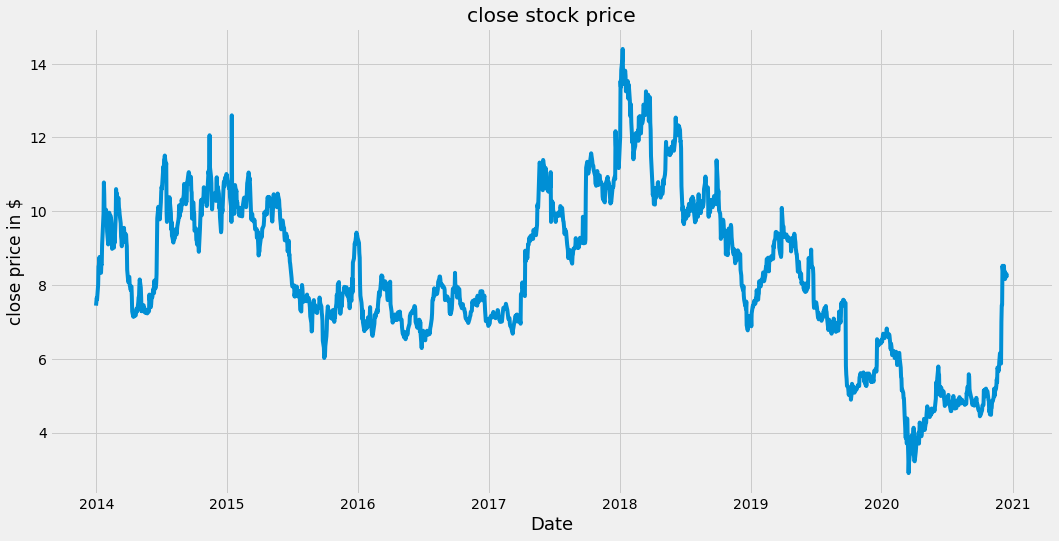

In [3]:
plt.figure(figsize=(16,8))
plt.title('close stock price')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize = 18)
plt.ylabel('close price in $')
plt.show()

In [18]:
stock_name =input()
stock_name

FDX


'FDX'

1344/1344 [==============================] - 24s 16ms/step - loss: 0.0061


<ipython-input-19-9abce7ec38bb>:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=predictions


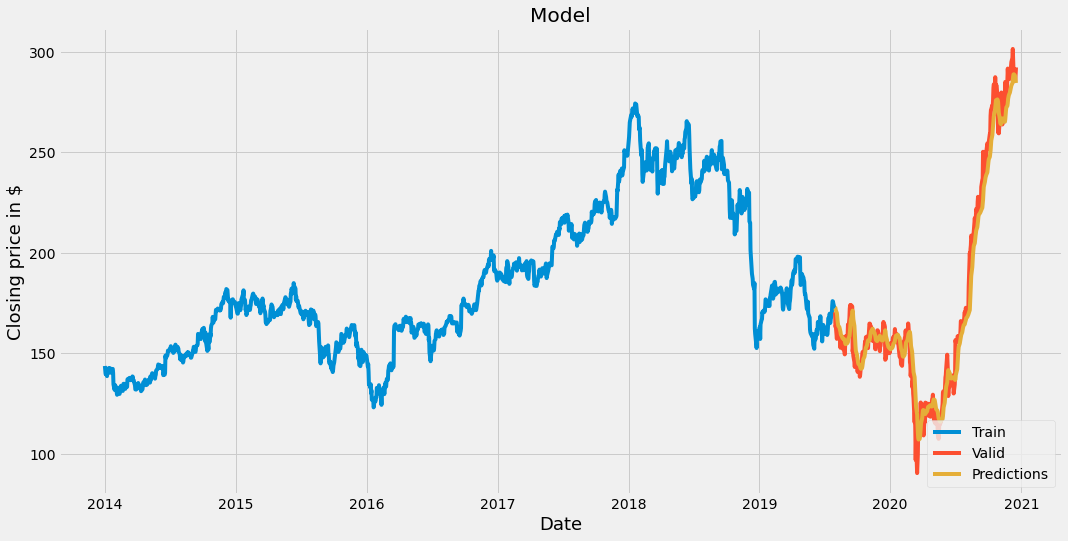

prdicted price


array([[284.25766]], dtype=float32)

In [19]:
import numpy as np
import math
import pandas_datareader as web
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
#stock_name ='NKE'
df  = web.DataReader(stock_name, data_source = 'yahoo', start= '2014-01-01' ,end= '2020-12-17')
data =df.filter(['Close'])
dataset = data.values
trainin_data_len =  math.ceil(len(dataset)*.8)
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)
train_data = scaled_data[0:trainin_data_len,:]
x_train =[]
y_train =[]
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
x_train, y_train =np.array(x_train) , np.array(y_train)
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,batch_size=1,epochs=1)
test_data = scaled_data[trainin_data_len - 60:,:]
x_test = []
y_test = dataset[trainin_data_len:,:]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])
x_test=np.array(x_test)
x_test= np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
train = data[:trainin_data_len]
valid = data[trainin_data_len:]
valid['Predictions']=predictions
#visualise the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Closing price in $',fontsize =18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Valid','Predictions'], loc='lower right')
plt.show()
stock_qoute = web.DataReader(stock_name, data_source='yahoo', start='2012-01-01',end='2020-12-17')
# create a new dataframe
new_df = stock_qoute.filter(['Close'])
#get last 60 days closing prices and convert dataframe to an array
last_60_days = new_df[-60:].values
#scale value between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
# create an empty list
X_test= []
#append the last 60 days
X_test.append(last_60_days_scaled)
#conver X_test to numpy array
X_test = np.array(X_test)
#reshape the data
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
#get predicted price of the stock
pred_price = model.predict(X_test)
# inverse sclaing
pred_price = scaler.inverse_transform(pred_price)
print("prdicted price")
pred_price



In [20]:
stock_qoute2 = web.DataReader(stock_name, data_source='yahoo', start='2020-12-18',end='2020-12-18')
#print("actual price")
stock_qoute2['Close']

Date
2020-12-17    292.260010
2020-12-18    275.570007
Name: Close, dtype: float64